#### Enviroment
Python 3.11.0

-----------------------------

### Libraries

In [2]:
from tabula.io import read_pdf
import pandas as pd
import tabula
import os

In [3]:
print(pd.options.display.max_rows) 

60


#### This chunk of the code is for you to know how to read PDF files but they are not going to be availabe becase contains sensible data; however you can use it to create the your own csv file to work with.


In [5]:
dir = os.getcwd()
dir_path = dir+'\Extractos'   # Just to find the path where de bank resume of expenses are available

lista_pdf = []  # List to store de name of .pdf

for files in os.listdir(dir_path):
    if files.endswith('pdf'):  #just files *.pdf
        lista_pdf.append(files)
    
print(lista_pdf)

['Banco en Línea - Santander1.pdf', 'Banco en Línea - Santander2.pdf', 'Banco en Línea - Santander3.pdf', 'Banco en Línea - Santander4.pdf']


### Transform data to CSV using the librarie Tabula 

#### We have four .pdf files to onvert to .csv files

In [6]:
dir = os.getcwd()
dir_path = dir+'\Extractos\\'  

for df in lista_pdf:
   tabula.convert_into(dir_path + df, "output"+df+".csv", output_format="csv", pages='all')

#### Create list of all files in CSV format

In [7]:
dir_path = os.getcwd()

lista_csv = []

for files in os.listdir(dir_path):
    if files.endswith('csv'):
        lista_csv.append(files)
    
print(lista_csv)

['outputBanco en Línea - Santander1.pdf.csv', 'outputBanco en Línea - Santander2.pdf.csv', 'outputBanco en Línea - Santander3.pdf.csv', 'outputBanco en Línea - Santander4.pdf.csv']


### Cleancy 
This part we are going to prepare de files to be correctly read
The process involves to erase some rows because the pdf files have certain lines of information at the begining and at the end that is not necesary and might create dirty data

In [9]:
colnames = ['Fecha', 'Salida', 'Entrada',  'Descripción','Documento']

df_s0 =  pd.read_csv(lista_csv[0], encoding='Latin1',skiprows=[0,1], skipfooter=4, engine='python',names=colnames)
df_s1 =  pd.read_csv(lista_csv[1], encoding='Latin1',skiprows=[0,1], skipfooter=4,engine='python',  names=colnames)
df_s2 =  pd.read_csv(lista_csv[2], encoding='Latin1',skiprows=[0,1],skipfooter=4, engine='python', names=colnames)
df_s3 =  pd.read_csv(lista_csv[3], encoding='Latin1',skiprows=[0,1], skipfooter=4, engine='python', names=colnames)

60


#### Next process is to cancatenate all the files so we can work just with one , operartions are easy that way in this case

In [12]:
df_s_all = pd.concat([df_s0,df_s1,df_s2,df_s3])
df_s_all.head()

,Fecha,Salida,Entrada,Descripción,Documento
0,03/01/2022,763.400,NaN,Transf. Internet a otro Bancos,0
1,03/01/2022,189.390,NaN,Traspaso Internet a T. Crédito,0
2,03/01/2022,30.092,NaN,Compra TOTTUS VICUNA MAC,0
3,03/01/2022,12.210,NaN,Compra BEST FOR PETS,0
4,03/01/2022,9.360,NaN,Compra SUPERMERCADO LOS,0


#### From this point on we are going to work just with purchase becauses (Compras column) because the porpouse of this analisys has to do with how much I am spending and where

In [33]:
df_purchase = df_s_all[df_s_all['Descripción'].str.contains('Compra') ]

In [ ]:
# Here we create the file taht is going to be use for the analisys
df_purchase.to_csv('Purchase.csv')


#### df_bnk_purchases is the dataset to work, it doesn't contain sensible data so it will be available in this repository of Github

In [4]:
import pandas as pd

df_bnk_purchases= pd.read_csv("Purchase.csv")

In [5]:
# Lets check the amount of NA in each of the columns of the dataset
df_bnk_purchases.isnull().sum()

Unnamed: 0       0
Fecha            0
Salida           0
Entrada        487
Descripción      0
Documento        0
dtype: int64

##### As we can see there is NA data in the column Entrada this is normal because the movements we are analysing are outcomes, in fact we can drop this column later since it is not necesary

#### On the other hand the column Descripcion has importan information that migth help us to segment information later for example:
- Transferences
- Who I transfered money
- Purchases
- Places where I purchase

In [7]:
# Lets proced spliting the column
purchases_des = df_bnk_purchases["Descripción"].str.split(' ',  1 ,expand=True).reset_index(drop=True)
purchases_des.head(10)

C:\Users\yohan\AppData\Local\Temp\ipykernel_3136\1139277472.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  purchases_des = df_bnk_purchases["Descripción"].str.split(' ',  1 ,expand=True).reset_index(drop=True)


,0,1
0,Compra,TOTTUS VICUNA MAC
1,Compra,BEST FOR PETS
2,Compra,SUPERMERCADO LOS
3,Compra,STARBUCKS ESTADO
4,Compra,POLLA CHILENA
5,Compra,NOTARIA ELENA TOR
6,Compra,PEPE
7,Compra,NOTARIA LASCAR
8,Compra,SN CAMILO METRO I
9,Compra,SODIMAC PARQUE AR


#### Most of the information in the Descripción column has three states 0= type, 1 =Lugar
Lets replace the names of the columns

In [8]:
purchases_ren = purchases_des.rename(columns= {0:'Tipo',1:'Lugar'})
purchases_ren.head(10)

,Tipo,Lugar
0,Compra,TOTTUS VICUNA MAC
1,Compra,BEST FOR PETS
2,Compra,SUPERMERCADO LOS
3,Compra,STARBUCKS ESTADO
4,Compra,POLLA CHILENA
5,Compra,NOTARIA ELENA TOR
6,Compra,PEPE
7,Compra,NOTARIA LASCAR
8,Compra,SN CAMILO METRO I
9,Compra,SODIMAC PARQUE AR


In [9]:
# Now lets join the descriprions columns to the dataset
df_purchases_join = df_bnk_purchases.join(purchases_ren).reset_index(drop=True)
df_purchases_join.head()

,Unnamed: 0,Fecha,Salida,Entrada,Descripción,Documento,Tipo,Lugar
0,2,03/01/2022,30.092,NaN,Compra TOTTUS VICUNA MAC,0,Compra,TOTTUS VICUNA MAC
1,3,03/01/2022,12.210,NaN,Compra BEST FOR PETS,0,Compra,BEST FOR PETS
2,4,03/01/2022,9.360,NaN,Compra SUPERMERCADO LOS,0,Compra,SUPERMERCADO LOS
3,5,03/01/2022,8.350,NaN,Compra STARBUCKS ESTADO,0,Compra,STARBUCKS ESTADO
4,6,03/01/2022,3.000,NaN,Compra POLLA CHILENA,0,Compra,POLLA CHILENA


In [10]:
# Let see the shape of the Dataset
df_purchases_join.shape

(487, 8)

#### Another split that can be usefull is Date, we have to separate year, month and day in order to create a granular analisys and see if there is a patern in the way I spend money

In [11]:
# To see if I can split dates I have to convert Fecha into a date type, for now is an object
df_purchases_join.dtypes

Unnamed: 0       int64
Fecha           object
Salida         float64
Entrada        float64
Descripción     object
Documento        int64
Tipo            object
Lugar           object
dtype: object

In [12]:
df_purchases_join['Fecha'] = pd.to_datetime(df_purchases_join['Fecha'] , dayfirst=True)

In [13]:
df_purchases_join.dtypes

Unnamed: 0              int64
Fecha          datetime64[ns]
Salida                float64
Entrada               float64
Descripción            object
Documento               int64
Tipo                   object
Lugar                  object
dtype: object

#### There are a couple of columns that we are not going to use because they don't have relevant information

In [14]:
df_purchases_join.drop(['Unnamed: 0','Descripción','Entrada','Documento'],  axis='columns', inplace=True)
df_purchases_join.head()

,Fecha,Salida,Tipo,Lugar
0,2022-01-03,30.092,Compra,TOTTUS VICUNA MAC
1,2022-01-03,12.210,Compra,BEST FOR PETS
2,2022-01-03,9.360,Compra,SUPERMERCADO LOS
3,2022-01-03,8.350,Compra,STARBUCKS ESTADO
4,2022-01-03,3.000,Compra,POLLA CHILENA


#### Lets proceed with the split of date

In [16]:
df_purchases_join['year']= df_purchases_join['Fecha'].dt.year
df_purchases_join['month']= df_purchases_join['Fecha'].dt.month
df_purchases_join['semana']= df_purchases_join['Fecha'].dt.week
df_purchases_join['day']= df_purchases_join['Fecha'].dt.day

df_purchases_join.head(5)

C:\Users\yohan\AppData\Local\Temp\ipykernel_3136\455864625.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_purchases_join['semana']= df_purchases_join['Fecha'].dt.week


,Fecha,Salida,Tipo,Lugar,year,month,semana,day
0,2022-01-03,30.092,Compra,TOTTUS VICUNA MAC,2022,1,1,3
1,2022-01-03,12.210,Compra,BEST FOR PETS,2022,1,1,3
2,2022-01-03,9.360,Compra,SUPERMERCADO LOS,2022,1,1,3
3,2022-01-03,8.350,Compra,STARBUCKS ESTADO,2022,1,1,3
4,2022-01-03,3.000,Compra,POLLA CHILENA,2022,1,1,3


#### Lets create some data visualization just to give us an idea of what we are dealing with

In [17]:
# Skimpy is a librarie that create a framework for us to help with general observation 
#pip install skimpy

from skimpy import skim
skim(df_purchases_join)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 487    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p75     ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Salida             │    0 │       0 │      51 │     140 │       1 │     4.4 │      29 │     900 │    █     │  │
│ │ year               │    0 │       0 │    2000 │    0.26 │    2000 │    2000 │    2000 │    2000 │  █    ▁  │  │
│ │ month              │    0 │       0 │     5.6 │     3.7 │       1 │       2 │       9 │      12 │  █▄▅▃▅▃  │  │
│ │ semana             │    0 │       0 │      23 │      16 │       1 │       7 │      38 │      52 │  █▃▅▂▅▃  │  │
│ │ day                │    0 │       0 │      16 │     8.6 │       1 │       9 │      24 │      31 │  ▅▅▄█▇▆  │  │
│ └────────────────────┴──────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2022-01-03      │     2023-01-30      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Tipo                      │       0 │          0 │                            1 │                      490 │  │
│ │ Lugar                     │       0 │          0 │                            1 │                      490 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

### What we are able to deduce is:
- In Salda the mean is 51 and the sd us high = 140
- The four quartiles of column Salida have a big gap between them so it is necesary to create segmentations to cluster groups
- We hace sone NA in column lugar maybe because in the split done before it create spaces in blank


### Data Visualization

In [19]:
import seaborn as sns

C:\Users\yohan\AppData\Local\Temp\ipykernel_3136\3702544786.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = hm.corr() #Calculate the correlation of the above variables


<Axes: >

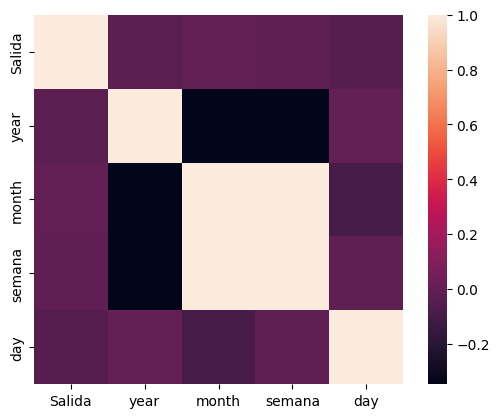

In [20]:
# Correlation in Data
hm = df_purchases_join[['Salida',	'year',	'month',	'semana',	'day',	'Lugar']] #Subsetting the data
cor = hm.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

#### We have obtained the heatmap of correlation among the variables. The color palette in the side represents the amount of correlation among the variables. The lighter shade represents high correlation.
this grap is pretty obvios but as an excersice is ok

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

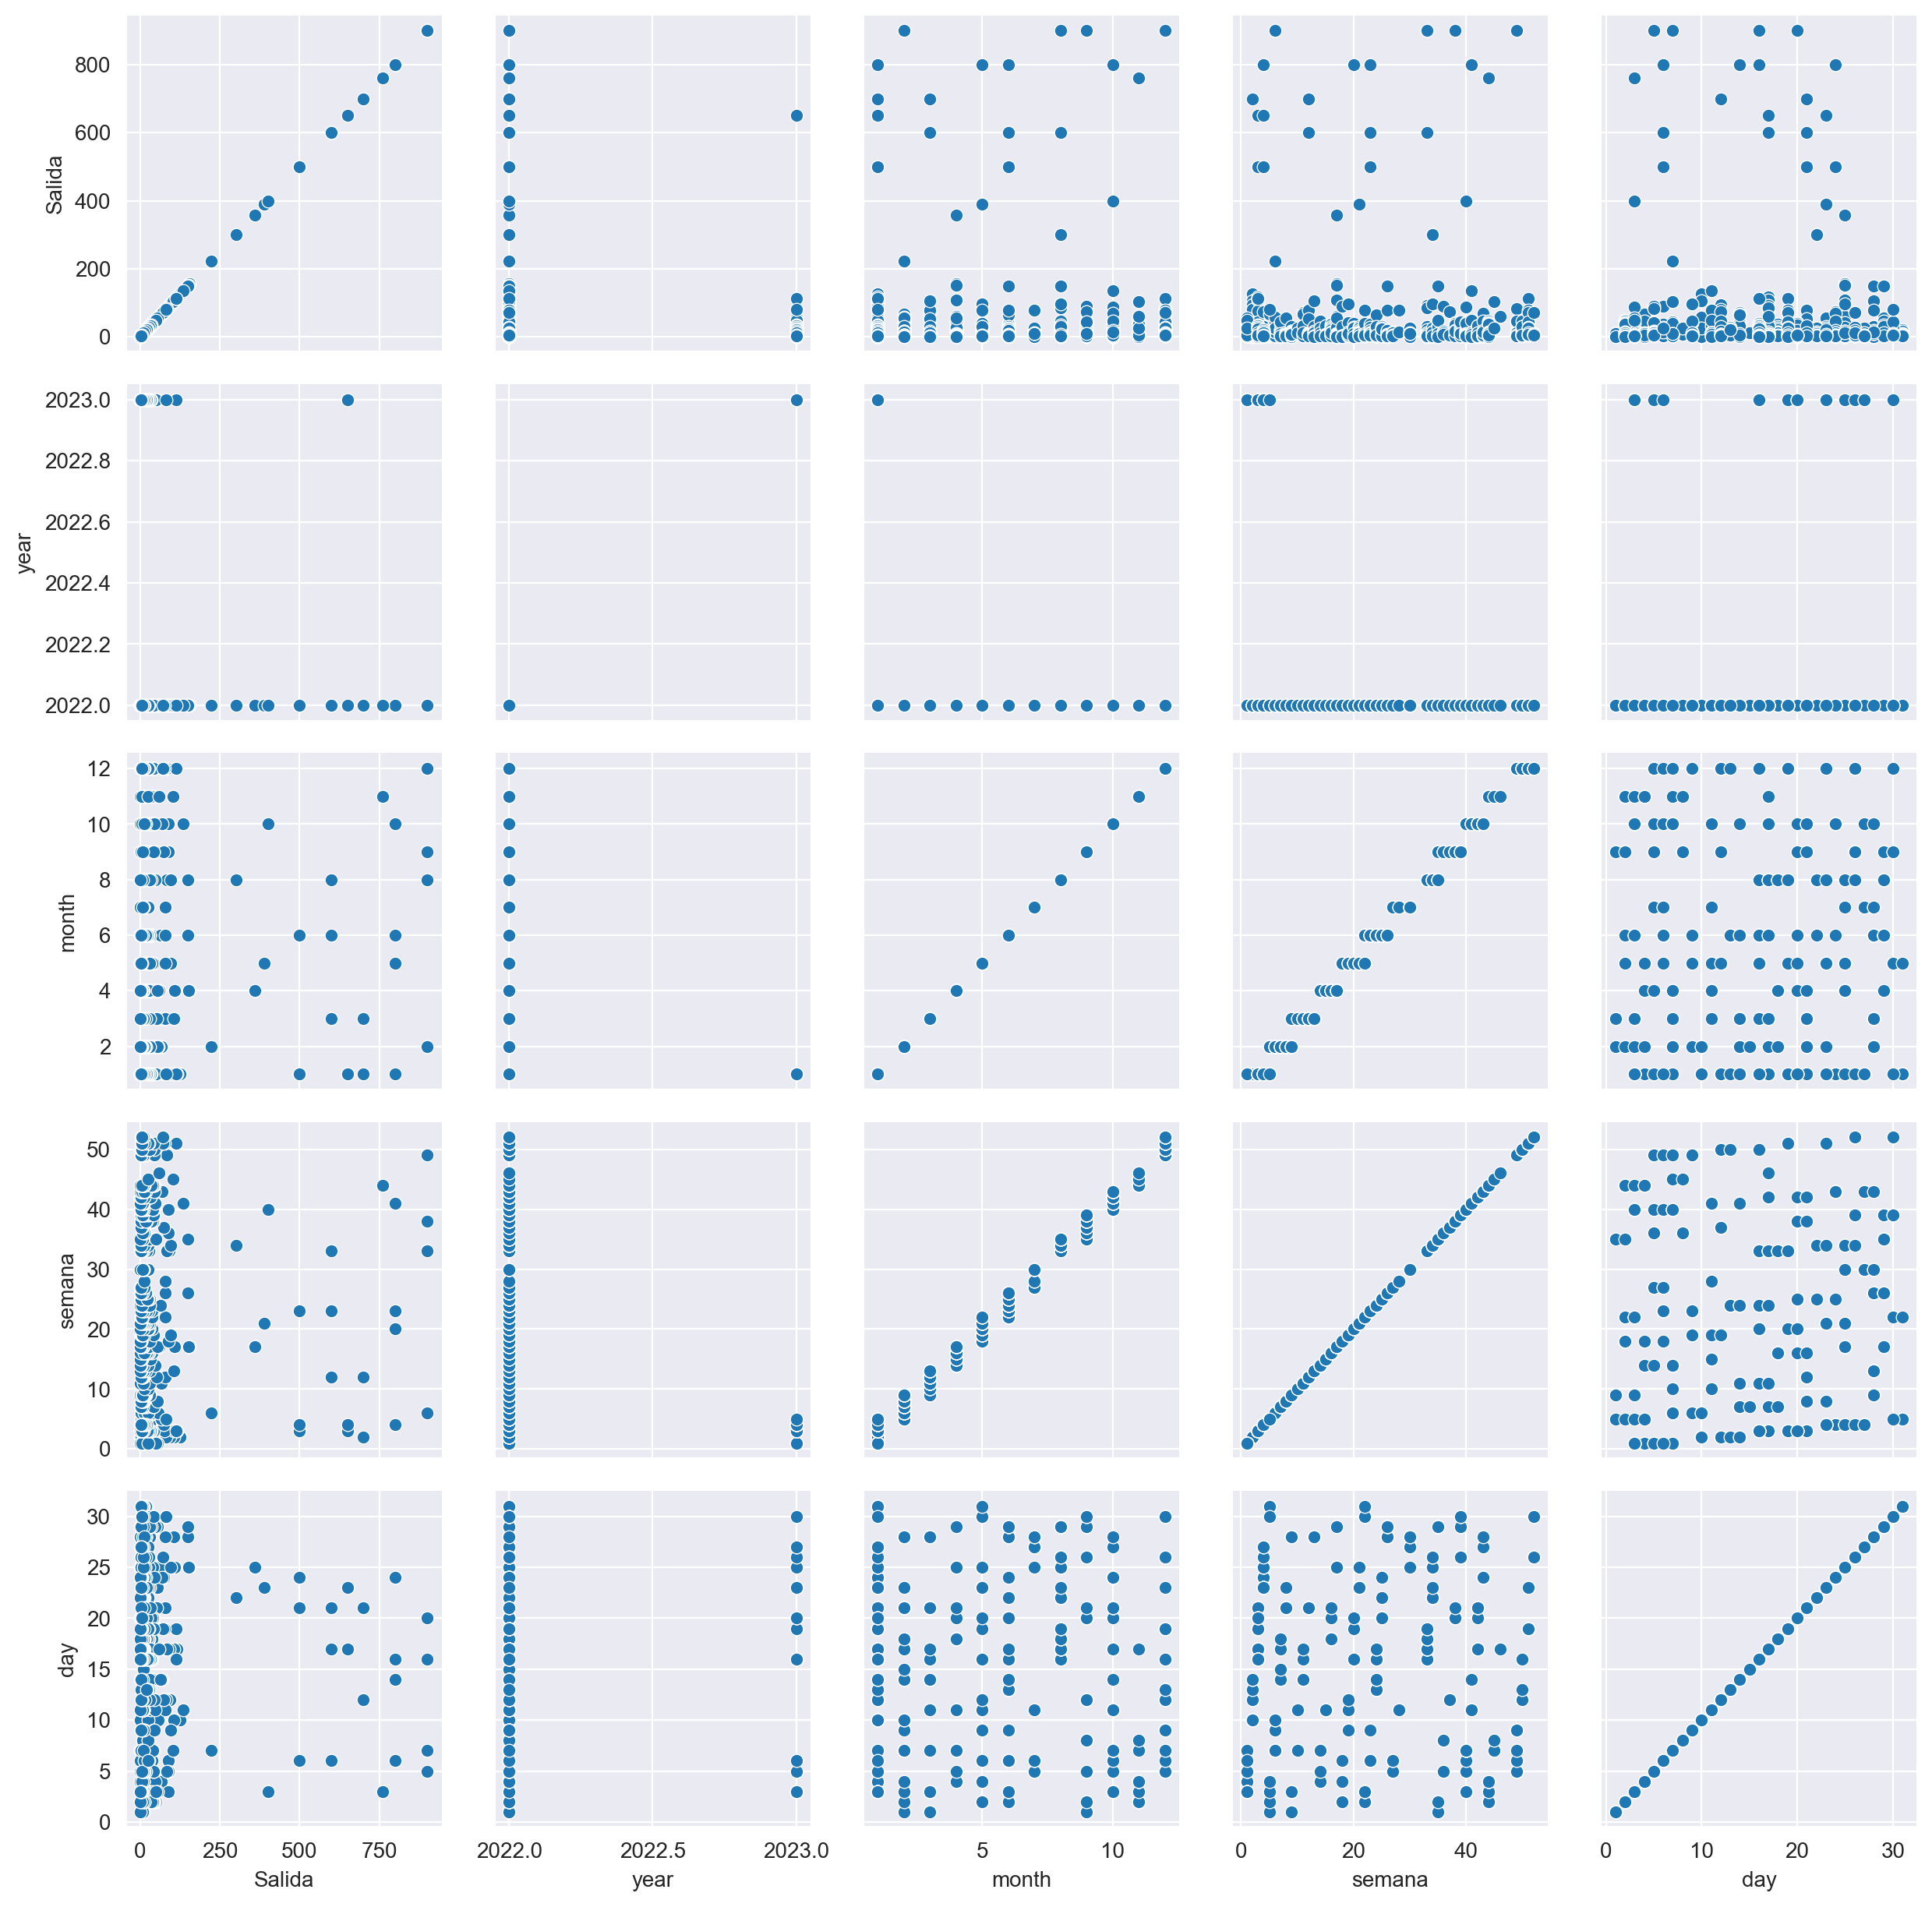

In [22]:
# Visualize the correlation your data and identify variables for further analysis
g = sns.PairGrid(df_purchases_join)
g.map(sns.scatterplot);

As we can see most of the expenses are under 50 so ir woulbe a great idea to separate expenses an as the porpuse of the analisys is to identify frecuent low expenses lets just take under 50

In [24]:
df_purch_under50 = df_purchases_join[df_purchases_join['Salida']<=50]   
df_purch_under50.describe()


,Salida,year,month,semana,day
count,416.000000,416.000000,416.000000,416.000000,416.000000
mean,12.661495,2022.074519,5.661058,22.913462,16.312500
std,11.792254,0.262930,3.690825,15.915355,8.682259
min,1.000000,2022.000000,1.000000,1.000000,1.000000
25%,3.537500,2022.000000,2.000000,7.000000,9.000000
50%,9.004500,2022.000000,5.000000,22.000000,17.000000
75%,17.062500,2022.000000,9.000000,38.000000,24.000000
max,48.884000,2023.000000,12.000000,52.000000,31.000000


#### Now lets have an idea of the places and amount of money paid in a graph

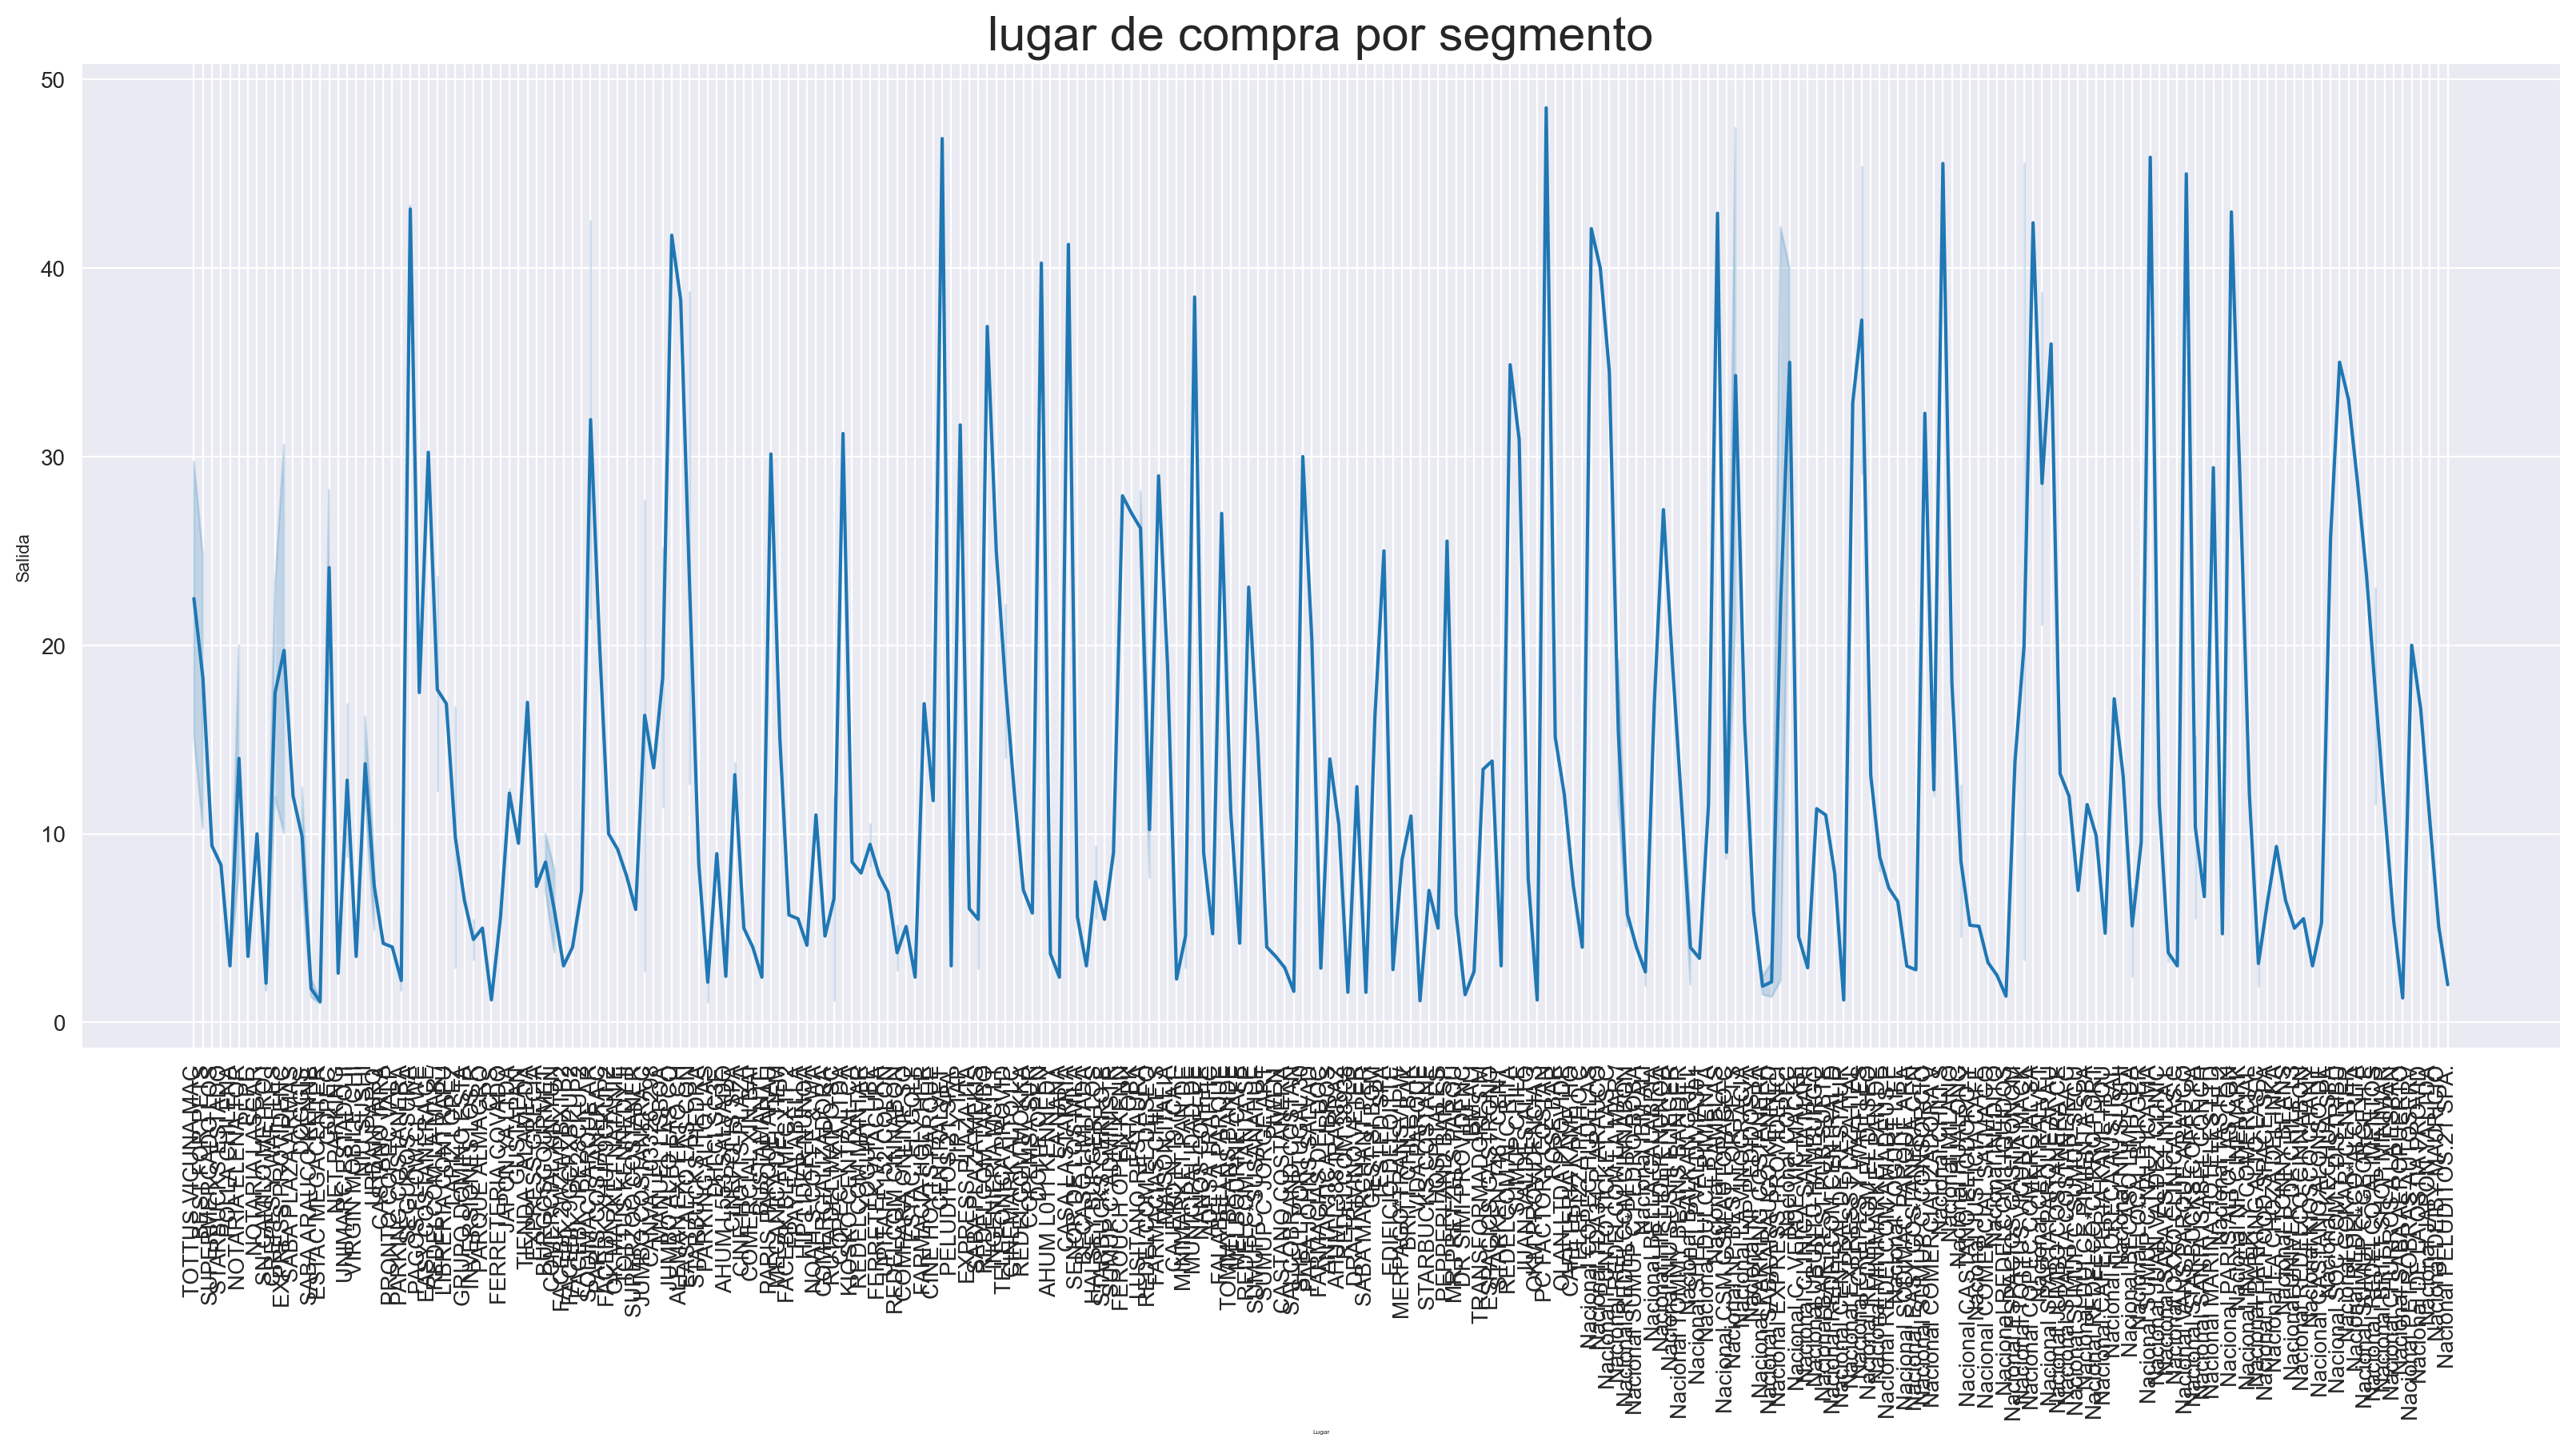

In [25]:
import numpy as np
plt.figure(1, figsize = (20,8))
ax = sns.lineplot(data=df_purch_under50, x=df_purch_under50['Lugar'], y=df_purch_under50['Salida'])

plt.xticks(rotation=90)
plt.title('lugar de compra por segmento', fontsize=22)
plt.ylabel('Salida', fontsize=8)
plt.xlabel('Lugar', fontsize=3,)


plt.show()

#### Due that the amount of places in the list is not possible to clearly visualize the distribution of information.
- Lets find out how to solve this problem

In [30]:
# With this chunk of code we find the unique string values usin and or operator like "any"
unicos =  [i for i in df_purch_under50['Lugar'] if not any (i in x and i!=x for x in df_purch_under50['Lugar'])]
unicos

['SUPERMERCADO LOS',
 'STARBUCKS ESTADO',
 'POLLA CHILENA',
 'NOTARIA ELENA TOR',
 'PEPE',
 'NOTARIA LASCAR',
 'SN CAMILO METRO I',
 'NOTARIA ELENA TOR',
 'SABA PLAZA ARMAS',
 'DOGGIS',
 'ESTAC MEGACENTER',
 'NET PARKING',
 'UNIMARC ESTADO II',
 'DOGGIS',
 'VIRGIN MOBILE CHI',
 'DOGGIS',
 'URBANPARQ',
 'CASTANO IRRA',
 'PRONTO COPEC VALP',
 'SEGUROS SURA',
 'PAGOS.FLOW.CL (WE',
 'LIBRERIA CONTRAPU',
 'LAPIZ LOPEZ',
 'GRUPO DOMINO ESTA',
 'INVERSIONES LOS R',
 'PARQUE ALMAGRO',
 'CPS',
 'FERRETERIA COVADO',
 'GUSTAPAN',
 'TIENDA - ALAMEDA',
 'DOGGIS',
 'EXPRESS GRECIA',
 'BURGOSGOURMET',
 'COMERCIAL XIN YUN',
 'POLLA CHILENA',
 'FACEBK 2WZWPBXTP2',
 'FACEBK 9GCFXBPUP2',
 'FACEBK JPE28CKUP2',
 'PARIS COSTANERA C',
 'FACEBK XHUP9CKUP2',
 'OK MARKET NATANIE',
 'TOTTUS KENNEDY II',
 'SUPERZOO COSTANER',
 'INVERSIONES LOS R',
 'CANVA* I03326-298',
 'MANUEL LISBOA',
 'JUMBO ALTO LAS CO',
 'ALEMAN EXPERTO CH',
 'EASY ALTO LAS CON',
 'STARBUCKS PIEDRA',
 'DOGGIS',
 'MANUEL LISBOA',
 'SEGUROS SU

#### Now lets create a Dictionary so we can know the value of each key

In [31]:
dic_fecuency = dict((i, unicos.count(i)) for i in unicos)

In [32]:
# Then we convert de Dcit in a dataframe.
df_purch_frec = pd.DataFrame(list(dic_fecuency.items()))
df_purch_frec = df_purch_frec.rename(columns= {0:'lugar',1:'frecuencia'})
df_purch_frec

,lugar,frecuencia
0,SUPERMERCADO LOS,1
1,STARBUCKS ESTADO,1
2,POLLA CHILENA,6
3,NOTARIA ELENA TOR,2
4,PEPE,1
...,...,...
215,Nacional PETROBRAS AUTOSERV,1
216,Nacional DE LA OSTIA PROVID,1
217,Nacional JAPON YA LTDA,1
218,Nacional DEIBY MAURICIO,1


##### If a store o place is visited just ones maybe theres in not significative data but places visited more than twice could mean a patern

In [33]:
frecuency_mayor2 = df_purch_frec[df_purch_frec['frecuencia']>2].reset_index(drop=True)
frecuency_mayor2.head()

,lugar,frecuencia
0,POLLA CHILENA,6
1,SN CAMILO METRO I,5
2,DOGGIS,6
3,URBANPARQ,3
4,EASY ALTO LAS CON,4


#### We select the places with more than two visits

In [34]:
frecuency_purchase= df_purch_under50[df_purch_under50['Lugar'].isin(frecuency_mayor2.iloc[:,0])].sort_values('Fecha').reset_index(drop=True)
frecuency_purchase

,Fecha,Salida,Tipo,Lugar,year,month,semana,day
0,2022-01-03,3.00,Compra,POLLA CHILENA,2022,1,1,3
1,2022-01-07,1.70,Compra,SN CAMILO METRO I,2022,1,1,7
2,2022-01-10,9.58,Compra,DOGGIS,2022,1,2,10
3,2022-01-14,15.17,Compra,DOGGIS,2022,1,2,14
4,2022-01-17,9.58,Compra,DOGGIS,2022,1,3,17
...,...,...,...,...,...,...,...,...
66,2023-01-20,4.95,Compra,Nacional REDELCOM CINNABON,2023,1,3,20
67,2023-01-20,4.80,Compra,Nacional SABA ARAUCO KENNED,2023,1,3,20
68,2023-01-23,2.40,Compra,Nacional BECASO LIMITADA,2023,1,4,23
69,2023-01-23,7.15,Compra,Nacional BECASO LIMITADA,2023,1,4,23


#### We group an sum the outcomes for each place

In [236]:
df_salida_lugar= frecuency_purchase.groupby('Lugar')['Salida'].agg(['sum','count']).reset_index()
df_orden_dec = df_salida_lugar.sort_values('sum', ascending=False).reset_index(drop=True)
df_orden_dec.head(20)

,Lugar,sum,count
0,Nacional CREPES Y WAFFLES,148.962,4
1,EASY ALTO LAS CON,91.510,4
2,Nacional CENTRALVET,85.737,3
3,Nacional TOTTUS VICUNA MACK,59.888,3
4,DOGGIS,59.080,6
5,TELEFONICA PROVID,54.180,3
6,CINEPOLIS SPA,39.400,3
7,Nacional REDELCOM CINNABON,22.990,4
8,URBANPARQ,21.700,3
9,POLLA CHILENA,18.000,6


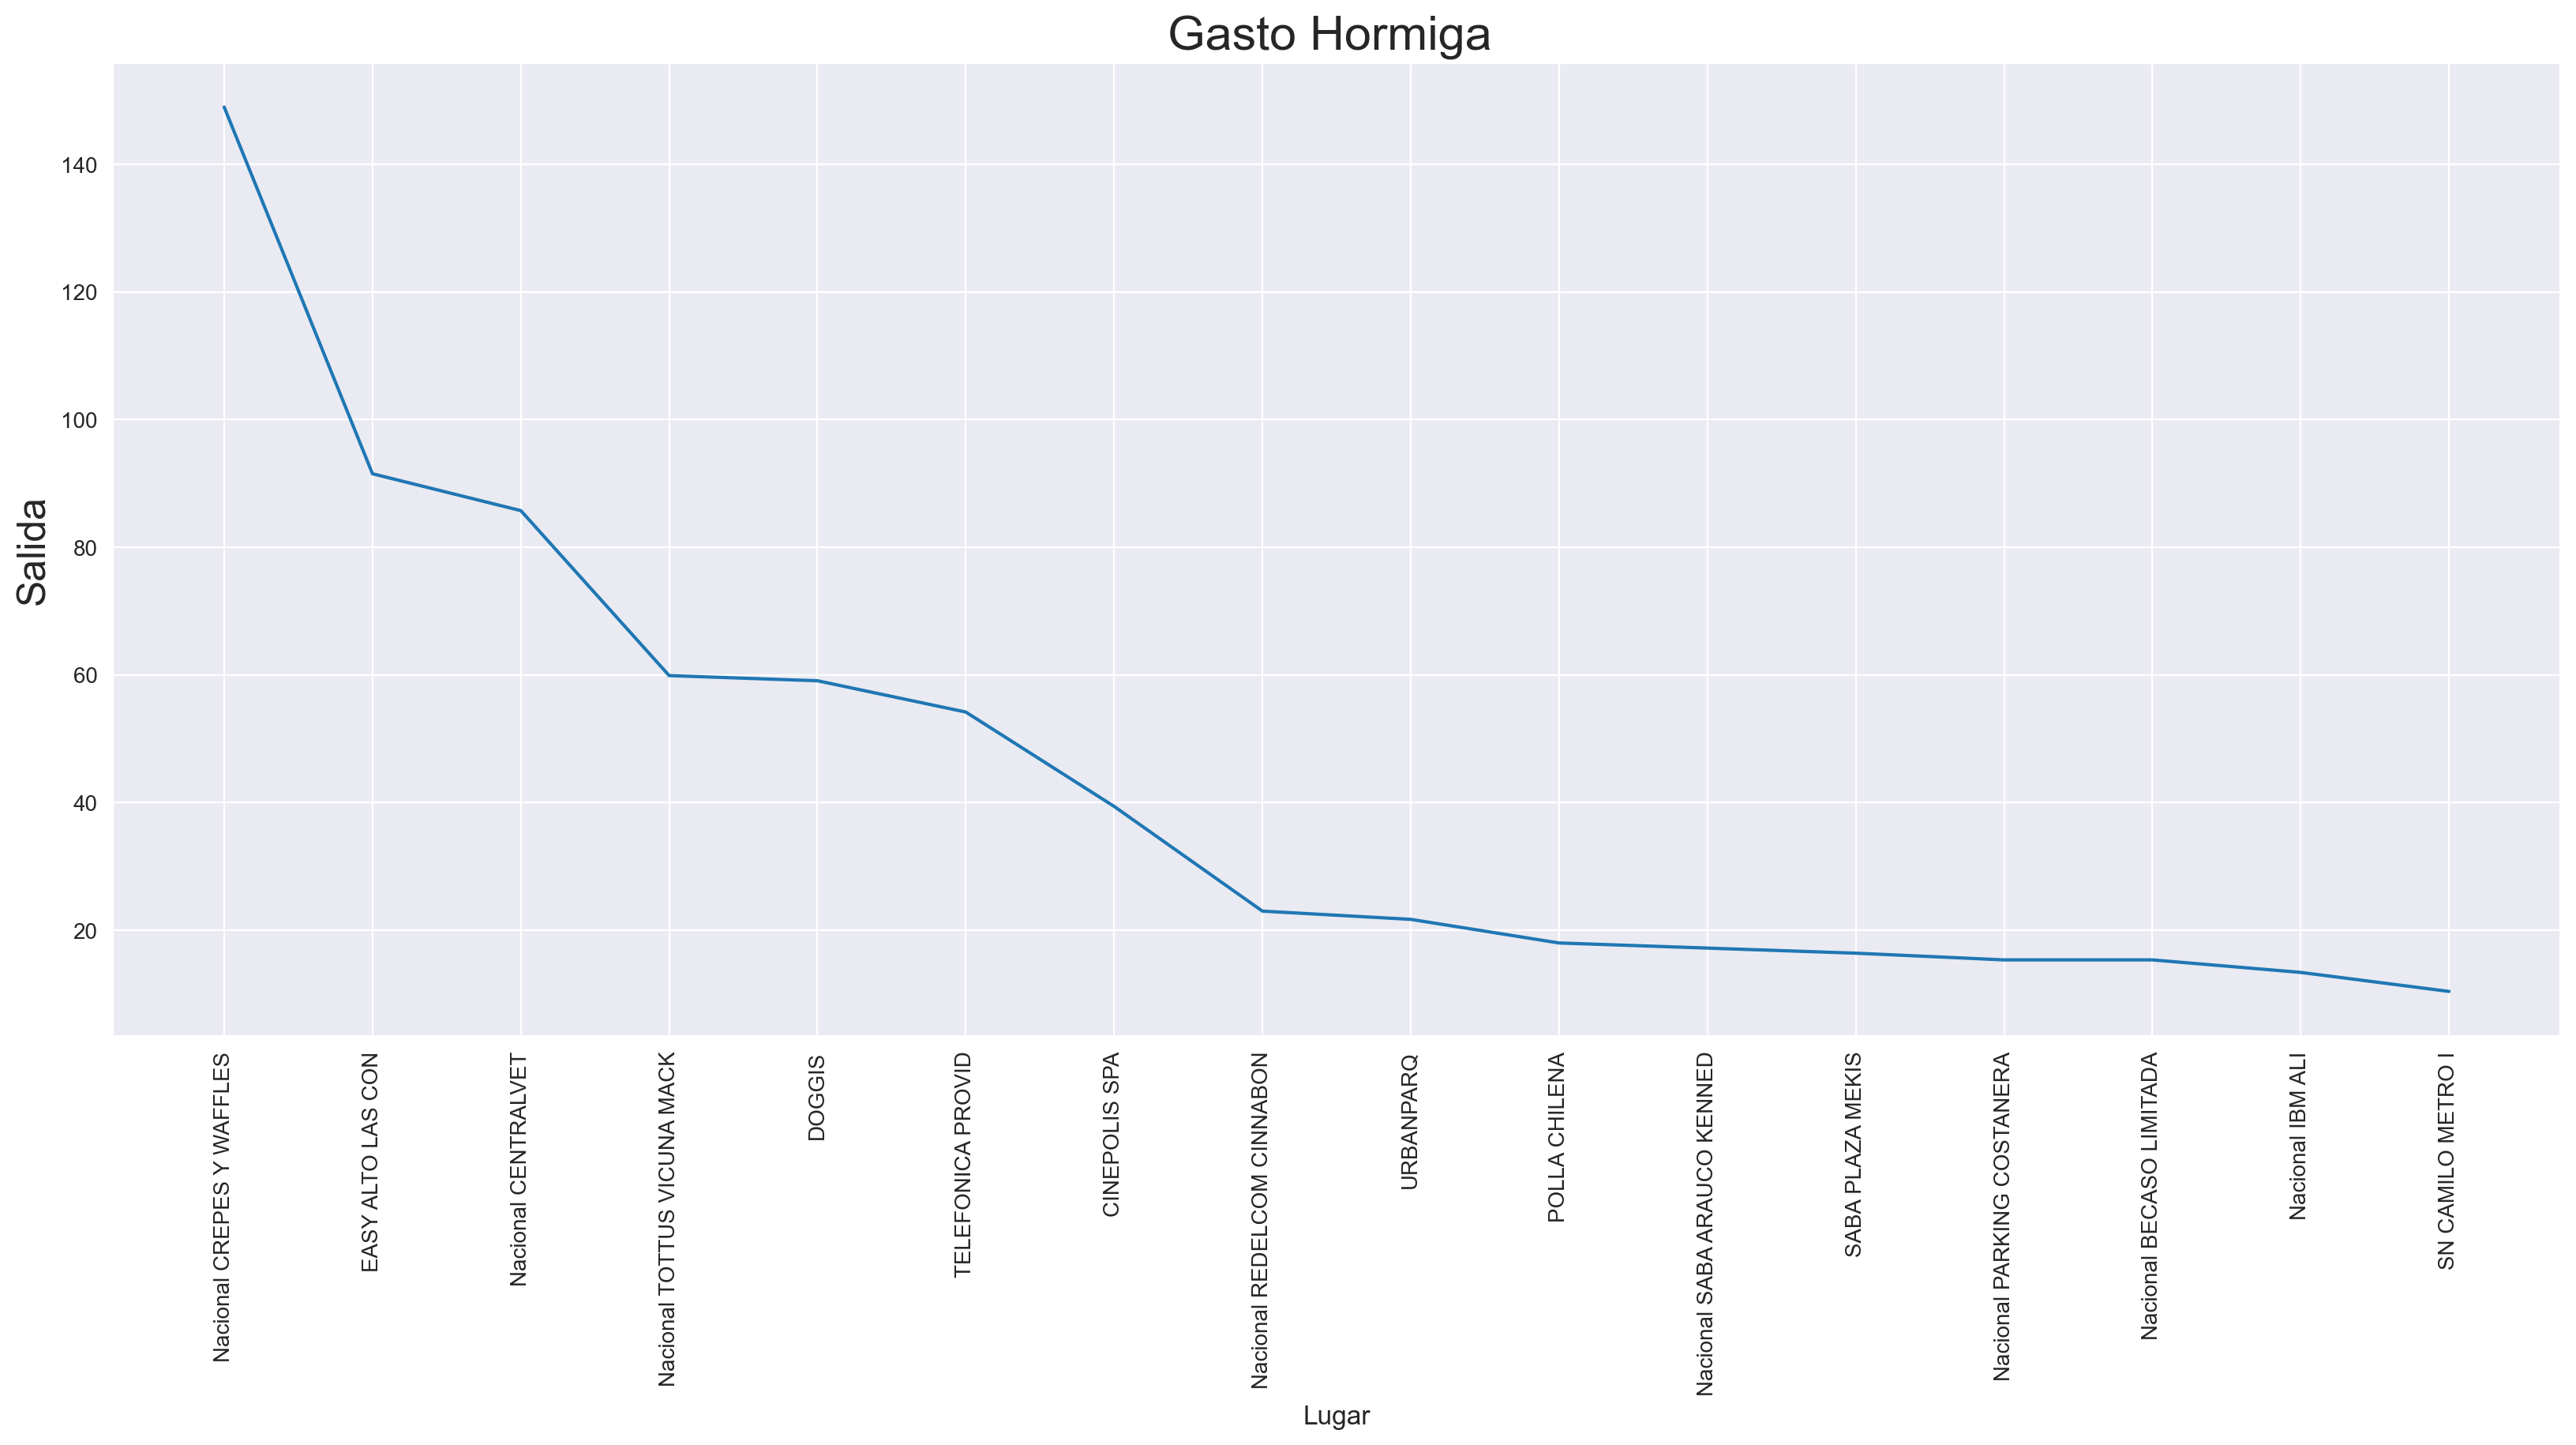

In [241]:
plt.figure(1, figsize = (20,8))
ax = sns.lineplot(data=df_orden_dec, x=df_orden_dec['Lugar'], y=df_orden_dec['sum'])

plt.xticks(rotation=90)
plt.title('Gasto Hormiga ', fontsize=22)
plt.ylabel('Salida', fontsize=18)
plt.xlabel('Lugar', fontsize=12,)


plt.show()

- As we can see Creppes y Waffles is the place where I spend the last year my money, I could be because is one of my favorite restaurants :)
- Easy Alto de las condes is where I buy stuff for my apartment, tables, lamps and other sometimes things that I need
- Central Ver is where I take my pets so is necesary


In [240]:
# This is the amount of money of my gasto hormiga for the last year I think is no so High I consider I take care of my finances
df_orden_dec['sum'].sum()

#689.547

689.547

In [41]:
frecuency_purchase

,Fecha,Salida,Tipo,Lugar,year,month,semana,day
0,2022-01-03,3.00,Compra,POLLA CHILENA,2022,1,1,3
1,2022-01-07,1.70,Compra,SN CAMILO METRO I,2022,1,1,7
2,2022-01-10,9.58,Compra,DOGGIS,2022,1,2,10
3,2022-01-14,15.17,Compra,DOGGIS,2022,1,2,14
4,2022-01-17,9.58,Compra,DOGGIS,2022,1,3,17
...,...,...,...,...,...,...,...,...
66,2023-01-20,4.95,Compra,Nacional REDELCOM CINNABON,2023,1,3,20
67,2023-01-20,4.80,Compra,Nacional SABA ARAUCO KENNED,2023,1,3,20
68,2023-01-23,2.40,Compra,Nacional BECASO LIMITADA,2023,1,4,23
69,2023-01-23,7.15,Compra,Nacional BECASO LIMITADA,2023,1,4,23


#### Next graphs show us more detail informations regarding the dates and amount of money spend in a place   :)

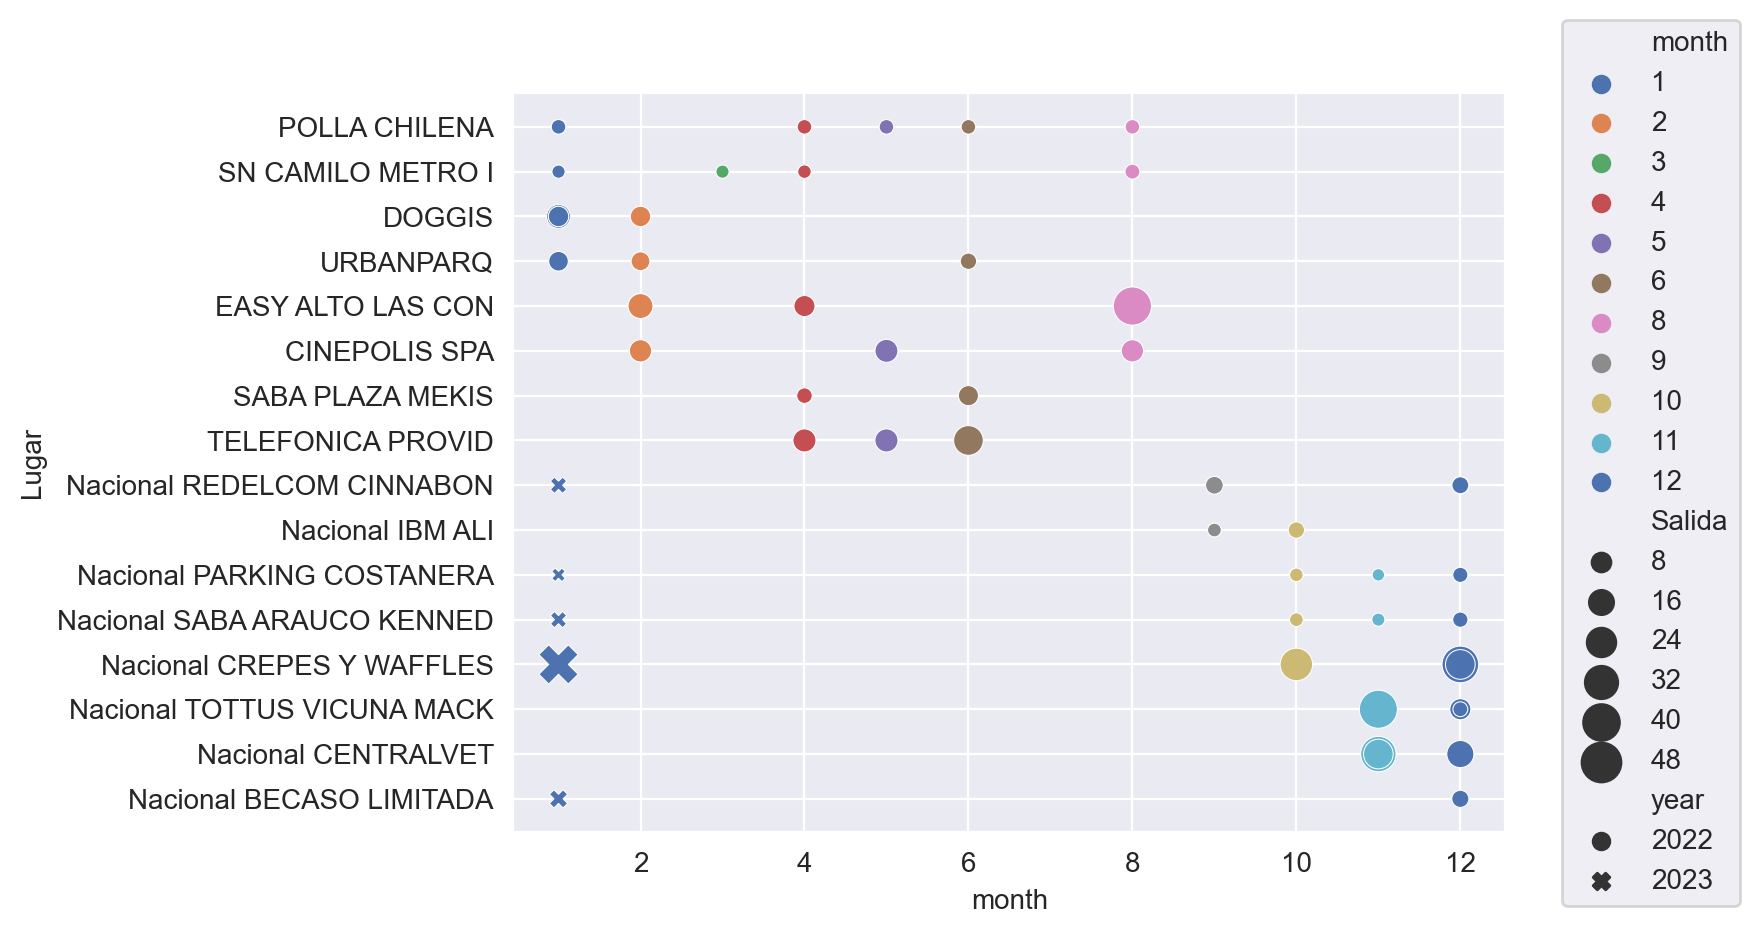

In [70]:
g= sns.scatterplot(data=frecuency_purchase, x='month', y= 'Lugar',style="year", palette="deep",size="Salida",sizes=(20, 200),hue='month')
g.legend(loc='right', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

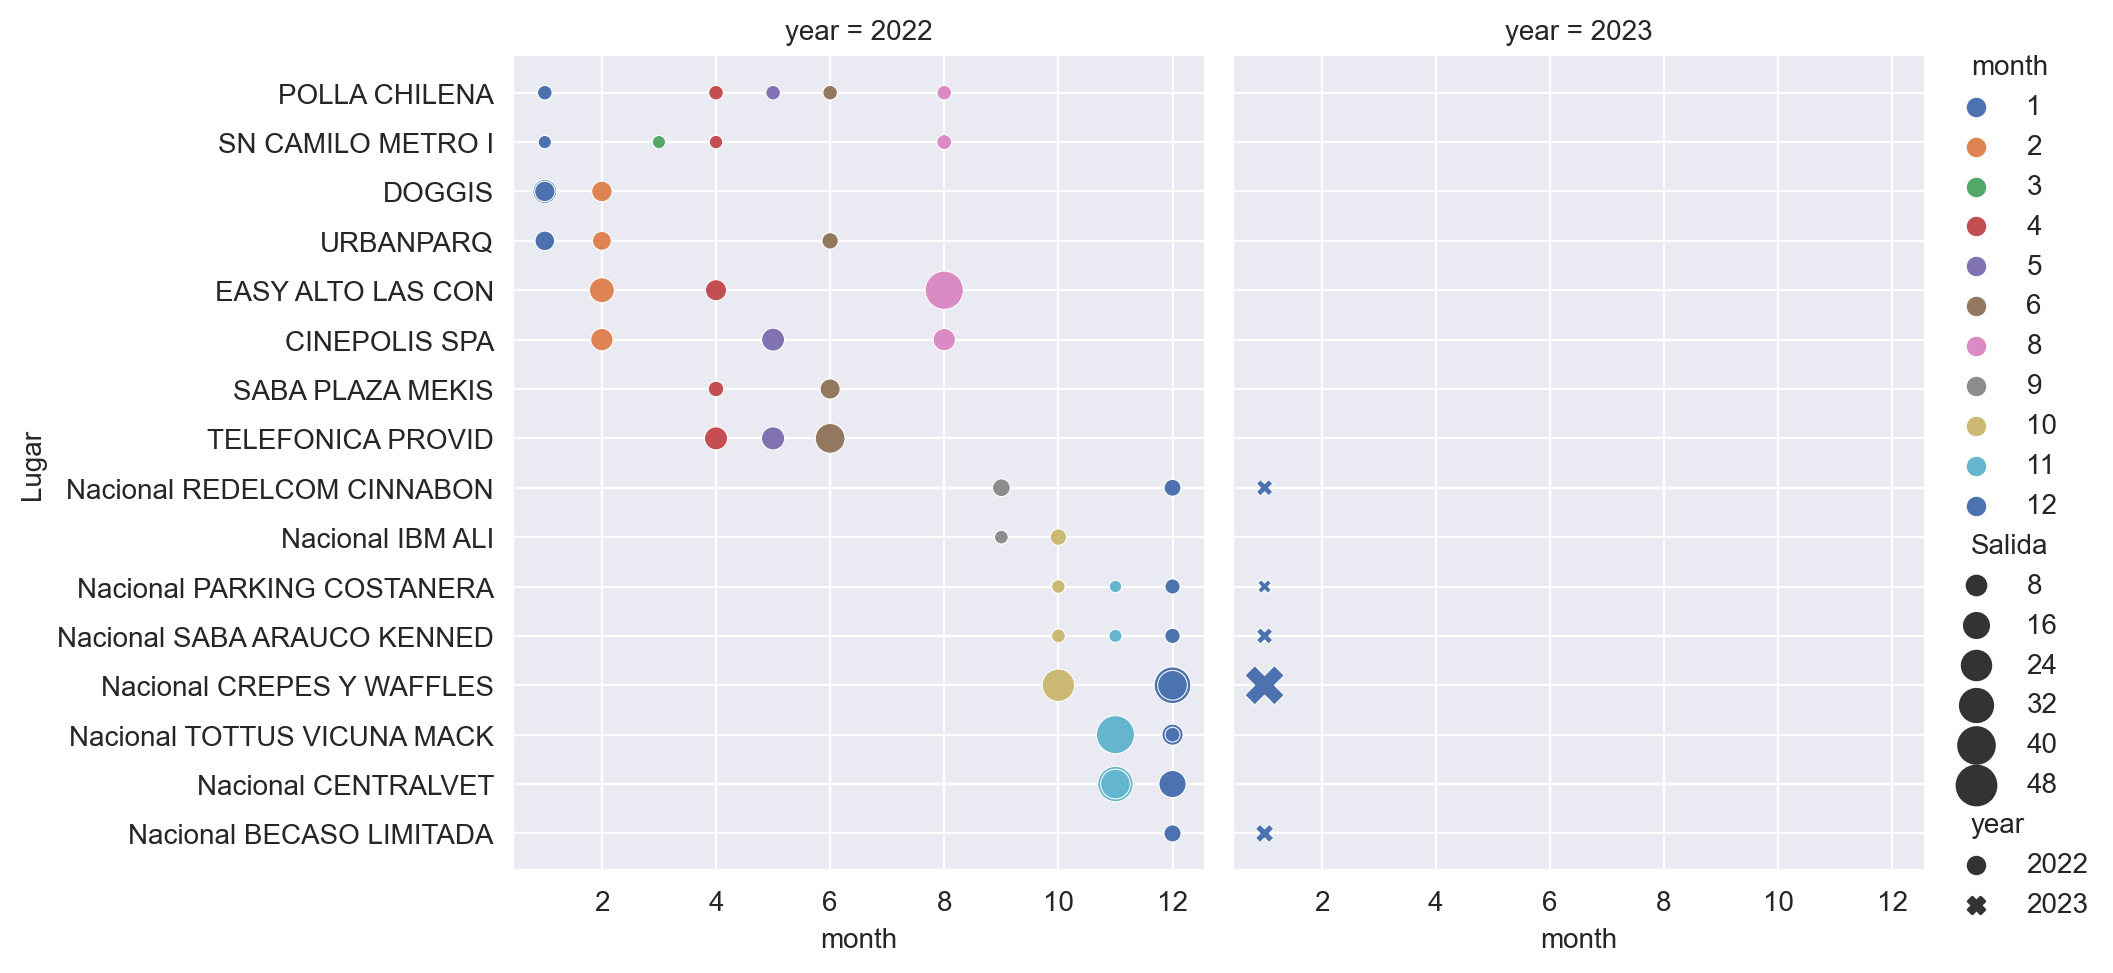

In [65]:
sns.relplot(
    data=frecuency_purchase, x='month', y= 'Lugar',
    col="year", style="year",hue='month', palette="deep",size="Salida",sizes=(20, 200),
    kind="scatter"
)

### Looking fordward it was entretained for you, for me it was,  and now I have a tool to verify my expenses and show my girlfrend that she has to be more supportive financially speaking jajajajaja. 